# 인구 소멸 데이터 분석 
#### 1) R 셋팅 
- 패키지 설치

#### 2)  인구소멸 관련 데이터셋 준비
  - 관련 데이터 셋 불러오기
 
#### 3) 훈련, 테스트셋의 구분
  - Train, Test 데이터 셋 지정
  
#### 4) 인구 소멸관련 적합한 독립변수 선정 
  - 선형회귀모형
  - 라쏘 모형, 능형회귀
  - 나무모형
  - 랜덤포레스트 
  - 부스팅
    
#### 5) 모형비교, 최종 모형 선택

## 1. R 환경 준비

In [200]:
#install.packages('ROCR')
#install.packages('gbm')
#install.packages('gridExtra')
suppressMessages(library(tidyverse))

In [201]:
suppressMessages(library(Metrics))
suppressMessages(library(dplyr))
suppressMessages(library(glmnet))
suppressMessages(library(randomForest))
suppressMessages(library(gbm))
suppressMessages(library(rpart))
suppressMessages(library(boot))
suppressMessages(library(ROCR))
suppressMessages(library(gridExtra))
suppressMessages(library(ggplot2))

## 2. 인구소멸 관련 데이터셋 준비 
- 종속변수 : 소멸비율
- 총 10개의 독립 변수 : 관광여가오락, 부동산, 생활서비스, 소매, 숙박, 음식, 의료, 학문교육, 외국인근로자, 결혼이민자
- 소멸지역여부 : '소멸위험지역', '소멸위기지역', '소멸안정지역'

In [203]:
library('readxl')
data <- read_excel('C:/Users/test/Desktop/DataScience/총_인구변수_excel.xlsx', sheet=1)
head(data)

지역,소멸비율,관광여가오락,부동산,생활서비스,소매,숙박,음식,의료,학문교육,외국인근로자,결혼이민자,소멸지역여부
경상북도 의성군,0.3139632,24,13,389,740,40,728,75,61,979,187,소멸위험지역
경상북도 의성군,0.3156284,26,14,407,771,40,21,787,66,821,190,소멸위험지역
경상북도 의성군,0.3180173,26,15,425,839,42,816,79,62,660,186,소멸위험지역
경상북도 의성군,0.3230777,26,15,424,839,43,816,75,62,649,198,소멸위험지역
전라남도 고흥군,0.3326796,34,17,514,1681,128,1253,122,96,422,228,소멸위험지역
전라남도 고흥군,0.3329543,34,17,514,1673,128,22,1237,96,154,254,소멸위험지역


In [204]:
str(data)

Classes 'tbl_df', 'tbl' and 'data.frame':	1970 obs. of  13 variables:
 $ 지역        : chr  "경상북도 의성군" "경상북도 의성군" "경상북도 의성군" "경상북도 의성군" ...
 $ 소멸비율    : num  0.314 0.316 0.318 0.323 0.333 ...
 $ 관광여가오락: num  24 26 26 26 34 34 26 29 20 30 ...
 $ 부동산      : num  13 14 15 15 17 17 15 14 14 14 ...
 $ 생활서비스  : num  389 407 425 424 514 514 425 495 388 497 ...
 $ 소매        : num  740 771 839 839 1681 ...
 $ 숙박        : num  40 40 42 43 128 128 42 124 40 123 ...
 $ 음식        : num  728 21 816 816 1253 ...
 $ 의료        : num  75 787 79 75 122 ...
 $ 학문교육    : num  61 66 62 62 96 96 61 89 58 89 ...
 $ 외국인근로자: num  979 821 660 649 422 154 535 133 434 122 ...
 $ 결혼이민자  : num  187 190 186 198 228 254 195 276 217 285 ...
 $ 소멸지역여부: chr  "소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" ...


### 독립변수와 종속변수 데이터 셋 설정

In [205]:
attach(data)

haha <- cbind(소멸비율, 관광여가오락, 부동산, 생활서비스, 소매, 숙박, 음식, 의료, 학문교육, 외국인근로자, 결혼이민자)
head(haha)

The following object is masked _by_ .GlobalEnv:

    소멸지역여부

The following objects are masked from training (pos = 12):

    결혼이민자, 관광여가오락, 부동산, 생활서비스, 소매, 소멸비율, 숙박,
    외국인근로자, 음식, 의료, 학문교육

The following objects are masked from training (pos = 13):

    결혼이민자, 관광여가오락, 부동산, 생활서비스, 소매, 소멸비율, 숙박,
    외국인근로자, 음식, 의료, 학문교육

The following objects are masked from training (pos = 14):

    결혼이민자, 관광여가오락, 부동산, 생활서비스, 소매, 소멸비율, 숙박,
    외국인근로자, 음식, 의료, 학문교육

The following objects are masked from data (pos = 17):

    결혼이민자, 관광여가오락, 부동산, 생활서비스, 소매, 소멸비율,
    소멸지역여부, 숙박, 외국인근로자, 음식, 의료, 지역, 학문교육

The following objects are masked from data (pos = 35):

    결혼이민자, 관광여가오락, 부동산, 생활서비스, 소매, 소멸비율,
    소멸지역여부, 숙박, 외국인근로자, 음식, 의료, 지역, 학문교육

The following objects are masked from data (pos = 36):

    결혼이민자, 관광여가오락, 부동산, 생활서비스, 소매, 소멸비율,
    소멸지역여부, 숙박, 외국인근로자, 음식, 의료, 지역, 학문교육

The following objects are masked from data (pos = 37):

    결혼이민자, 부동산, 생활서비스, 소매, 소멸비율, 소멸지역여부, 숙박,
    외국인근로자, 음식, 의료, 지역

The 

소멸비율,관광여가오락,부동산,생활서비스,소매,숙박,음식,의료,학문교육,외국인근로자,결혼이민자
0.3139632,24,13,389,740,40,728,75,61,979,187
0.3156284,26,14,407,771,40,21,787,66,821,190
0.3180173,26,15,425,839,42,816,79,62,660,186
0.3230777,26,15,424,839,43,816,75,62,649,198
0.3326796,34,17,514,1681,128,1253,122,96,422,228
0.3329543,34,17,514,1673,128,22,1237,96,154,254


In [211]:
haha <- as.data.frame(haha)

## 3. 훈련, 검증, 테스트셋의 구분
- 원 데이터를 6:2:2 비율로 훈련, 검증, 테스트셋으로 나눔.

In [206]:
set.seed(9876)
n <- nrow(haha)
idx <- 1:n
training_idx <- sample(idx, n*.60)
idx <- setdiff(idx, training_idx)
validate_idx <- sample(idx, n*.20)
test_idx <- setdiff(idx, validate_idx)
training <- haha[training_idx,]
validation <- haha[validate_idx,]
test <- haha[test_idx,]

In [207]:
str(training)
training <- as.data.frame(training)
validation <- as.data.frame(validation)
test <- as.data.frame(test)

 num [1:1182, 1:11] 2.531 0.966 0.5 1.657 1.127 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:11] "소멸비율" "관광여가오락" "부동산" "생활서비스" ...


#### 훈련 : 1182, 검증 : 394, 테스트 : 394 

In [208]:
nrow(training)
nrow(validation)
nrow(test)

[1] 1182

[1] 394

[1] 394

# 4. 인구 소멸관련 적합한 독립변수 선정

## A-1) 선형회귀모형

In [209]:
data_lm_full <- lm(소멸비율 ~ ., data=training)
summary(data_lm_full)


Call:
lm(formula = 소멸비율 ~ ., data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1498 -0.4501 -0.1007  0.2899  2.9091 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.916e-01  3.359e-02  29.521  < 2e-16 ***
관광여가오락  2.536e-05  2.701e-04   0.094  0.92520    
부동산        2.767e-04  1.528e-04   1.810  0.07052 .  
생활서비스   -4.240e-05  8.289e-05  -0.512  0.60908    
소매         -6.482e-05  2.127e-05  -3.048  0.00236 ** 
숙박         -9.670e-04  1.427e-04  -6.778 1.92e-11 ***
음식          1.562e-04  2.676e-05   5.838 6.84e-09 ***
의료          1.600e-04  3.184e-05   5.025 5.81e-07 ***
학문교육      2.474e-04  7.200e-05   3.437  0.00061 ***
외국인근로자  2.812e-05  5.587e-06   5.032 5.61e-07 ***
결혼이민자    1.584e-04  5.528e-05   2.866  0.00424 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6417 on 1171 degrees of freedom
Multiple R-squared:  0.5257,	Adjusted R-squared:  0.5217 
F-statistic: 129.8 on 10

## A-2) 선형회귀분석으로 예측한 종속값과 기존 종속값과의 비교를 통한 검증
- 선형회귀모형을 가지고 종속변수 예측값 출력

In [212]:
pop_lm <- predict(data_lm_full, newdata = haha)
head(pop_lm)
length(pop_lm)

1        2        3        4        5        6 
1.090632 1.088915 1.086867 1.086894 1.029639 1.012810

[1] 1970

- 출력된 예측값을 0.8 이하는 '소멸위험지역', 0.8 ~ 0.15는 '소멸위기지역', 그 이상은 '소멸안정지역으로' 지정

In [213]:
pred <- pop_lm 
pred <- round(pred, digits = 3)

a <- pred[pred < 0.8]
b<- pred[ 1.5 >= pred & pred >= 0.8]
c <- pred[1.5 < pred]

a[] <- '소멸위험지역'
b[] <- '소멸위기지역'
c[] <- '소멸안정지역'
pred<-c(a,b,c)
length(pred)

[1] 1970

In [215]:
head(pred)

45            346            359            380            407 
"소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" 
           425 
"소멸위험지역"

## A-3) 예측값과 실제값의 비교 결과 
- 총 1970 중 1229개 예측수를 보임 
- 약 65%정도의 예측률로 낮은 예측결과
- rmse 오차율은 0.63정도

In [217]:
result <- as.factor(data$소멸지역여부)
length(result)

[1] 1970

In [218]:
table(result, pred)

              pred
result         소멸안정지역 소멸위기지역 소멸위험지역
  소멸안정지역          758          155            0
  소멸위기지역            0          439            0
  소멸위험지역            0          586           32

In [219]:
result2 <- data$소멸비율 
rmse(result2, pop_lm)

[1] 0.6360454

- 로지스틱 모형의 예측 정확도 지표는 다음처럼 계산하고 시각화할 수 있다.
- 모형이 겹치지 않는게 좋은 결과값이지만 초록색인 소멸위기지역이 안정과 위험에 많이 겹치는 부분이 발생한다.
- 즉, 회귀모형에서는 소멸위기지역의 예측률이 가장 낮게 나오게 되었다.

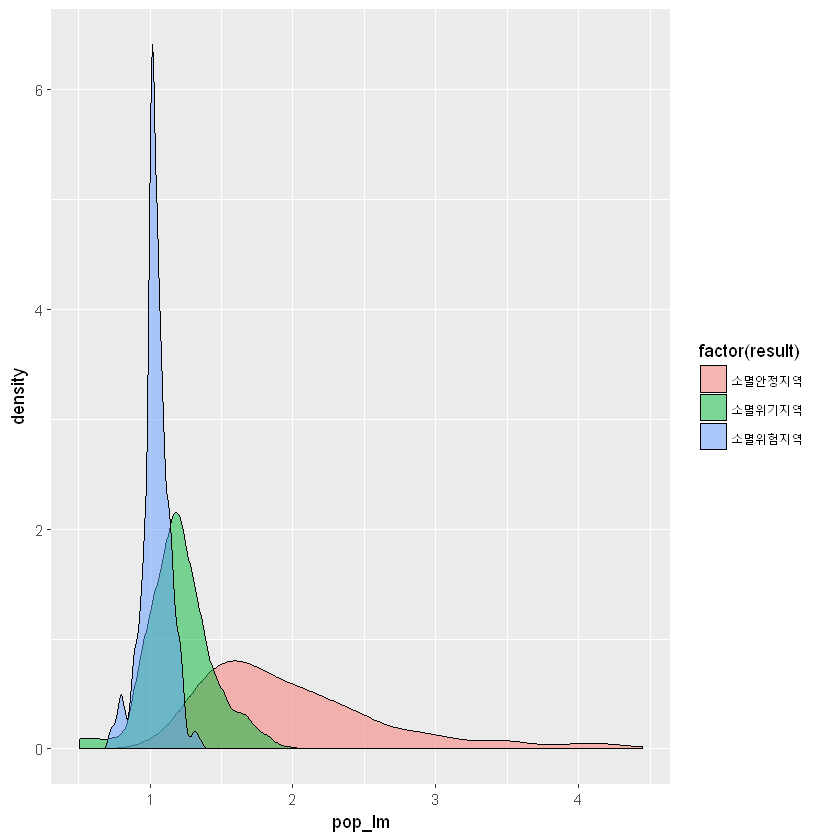

In [151]:
ggplot(data.frame(result, pop_lm),
             aes(pop_lm, fill=factor(result))) +
  geom_density(alpha=.5)

## B. 라쏘모형적합
- 일차 상호작용과 이차 상호작용 두개로 예측력 평가
- .^-1에서 ^2-1을 하는 것은 모든 이차상호작용을 포함하기 위함. 

In [221]:
xx <- model.matrix(소멸비율 ~ .-1, haha)
x <- xx[training_idx, ]
y <- training$소멸비율 
# <- xx[]
# <- haha$소멸비율
glimpse(x)

 num [1:1182, 1:10] 194 41 52 390 111 36 86 282 252 19 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:1182] "1668" "725" "244" "1119" ...
  ..$ : chr [1:10] "관광여가오락" "부동산" "생활서비스" "소매" ...


In [222]:
xx1 <- model.matrix(소멸비율 ~ .^2-1, haha)
x1 <- xx1[training_idx, ]
#x1 <- xx[]
y1 <- training$소멸비율 

## B-1. 람다 모수의 값에 따른 오차의 값의 변화 추이 비교 (1차 상호작용과 2차상호작용)

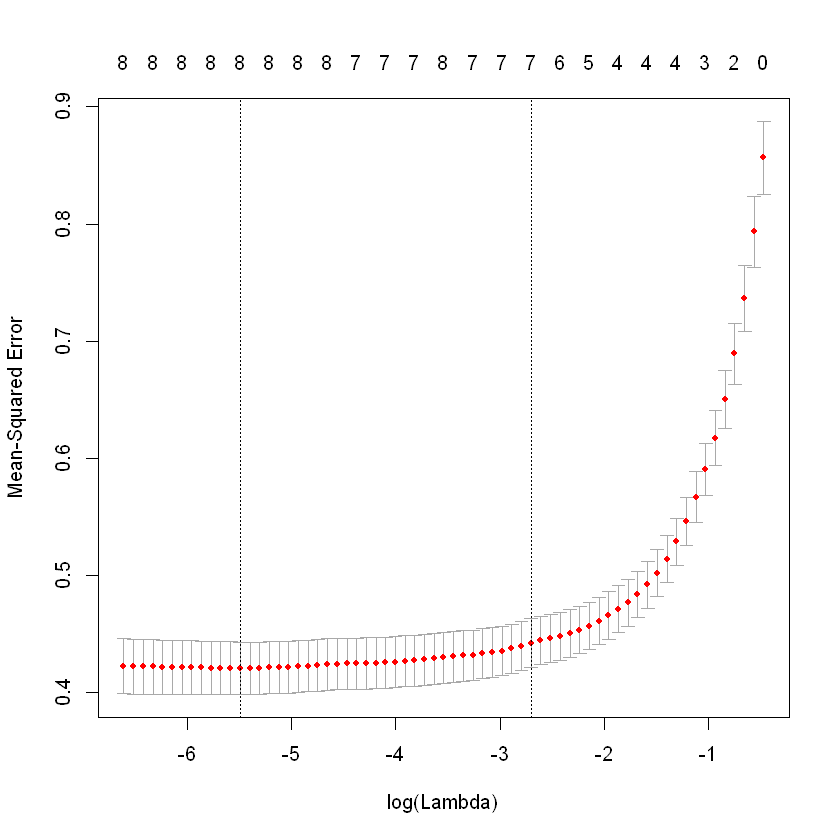

In [223]:
data_cvfit <- cv.glmnet(x,y)
plot(data_cvfit)

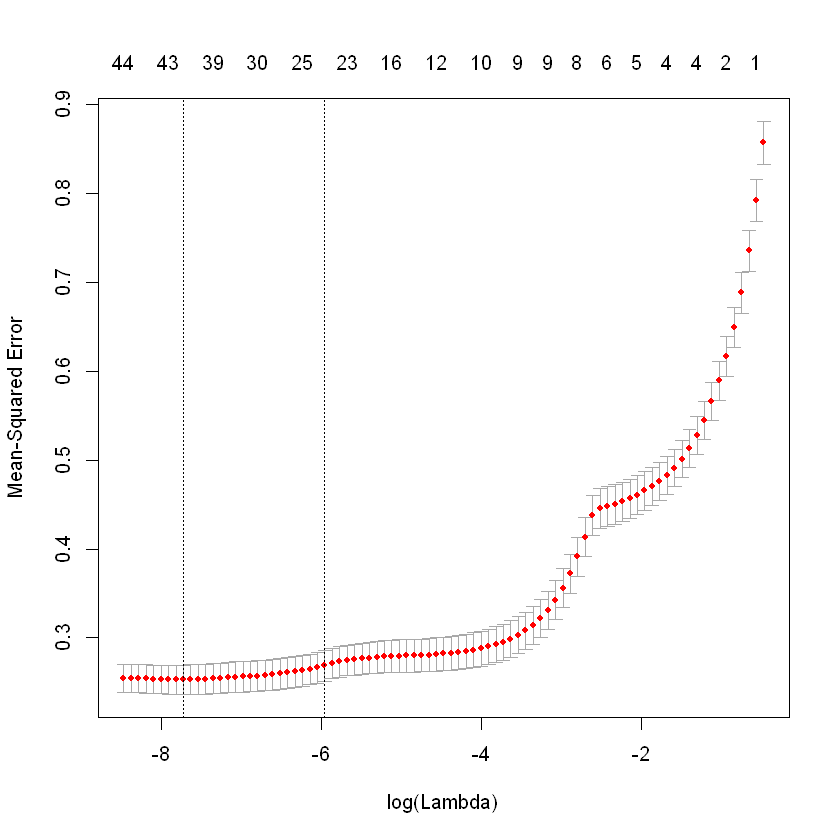

In [224]:
data_cvfit2 <- cv.glmnet(x1,y1)
plot(data_cvfit2)

## B-2) 라쏘모형에서 찾은 적합 변수 
- lambda.min에보면 **학문교육, 부동산, 외국인근로자**가 가장 유의수준이 높게 나왔다.
- 이차상호작용에서도 비슷하게 나옴

In [226]:
coef(data_cvfit, s = c('lambda.1se'))
coef(data_cvfit, s = c('lambda.min'))

11 x 1 sparse Matrix of class "dgCMatrix"
                         1
(Intercept)   1.020271e+00
관광여가오락  2.909364e-06
부동산        4.620091e-04
생활서비스    .           
소매          .           
숙박         -3.534786e-05
음식          7.574053e-06
의료          .           
학문교육      2.616499e-04
외국인근로자  1.424933e-05
결혼이민자    1.927711e-04

11 x 1 sparse Matrix of class "dgCMatrix"
                         1
(Intercept)   9.897723e-01
관광여가오락  .           
부동산        2.534444e-04
생활서비스    .           
소매         -4.098525e-05
숙박         -8.942245e-04
음식          1.188774e-04
의료          1.185145e-04
학문교육      2.301732e-04
외국인근로자  2.726557e-05
결혼이민자    1.610441e-04

In [49]:
coef(data_cvfit2, s = c('lambda.1se'))
coef(data_cvfit2, s = c('lambda.min'))

56 x 1 sparse Matrix of class "dgCMatrix"
                                      1
(Intercept)                7.636243e-01
관광여가오락               .           
부동산                     1.464893e-03
생활서비스                -1.120297e-04
소매                       .           
숙박                      -9.129961e-04
음식                       8.279079e-05
의료                       2.264343e-05
학문교육                   9.690570e-04
외국인근로자               1.204752e-05
결혼이민자                 2.021533e-05
관광여가오락:부동산        .           
관광여가오락:생활서비스    1.239145e-07
관광여가오락:소매          .           
관광여가오락:숙박          .           
관광여가오락:음식          2.118043e-08
관광여가오락:의료          .           
관광여가오락:학문교육      .           
관광여가오락:외국인근로자  6.892077e-08
관광여가오락:결혼이민자    3.118596e-08
부동산:생활서비스          3.994997e-08
부동산:소매                .           
부동산:숙박                .           
부동산:음식                .           
부동산:의료                .           
부동산:학문교육           -2.922176e-07
부동산:외국인근로자       -2.576011e-08
부동산:

56 x 1 sparse Matrix of class "dgCMatrix"
                                      1
(Intercept)                7.714141e-01
관광여가오락               1.529257e-04
부동산                     1.536293e-03
생활서비스                -6.175350e-04
소매                      -2.887739e-05
숙박                      -9.218094e-04
음식                       2.433246e-04
의료                       1.877419e-04
학문교육                   1.333910e-03
외국인근로자               2.823261e-05
결혼이민자                 5.043716e-05
관광여가오락:부동산       -8.735854e-08
관광여가오락:생활서비스    1.000350e-08
관광여가오락:소매          .           
관광여가오락:숙박          .           
관광여가오락:음식          7.564439e-09
관광여가오락:의료         -1.179256e-07
관광여가오락:학문교육      6.027249e-08
관광여가오락:외국인근로자  6.847138e-08
관광여가오락:결혼이민자    6.302382e-07
부동산:생활서비스          2.085656e-07
부동산:소매                .           
부동산:숙박               -2.072130e-07
부동산:음식                1.170347e-08
부동산:의료               -1.213948e-08
부동산:학문교육           -6.448417e-07
부동산:외국인근로자       -6.745053e-08
부동산:

## B-3) 람다, 이차상호작용 람다 모형의 예측값 출력

In [227]:
predict.cv.glmnet(data_cvfit, s= 'lambda.min', newx = x[1:10,])
predict.cv.glmnet(data_cvfit2, s= 'lambda.min', newx = x1[1:10,])

,1
1668,1.5619861
725,1.1671669
244,1.1019323
1119,1.5530762
835,1.2838100
546,0.9897661
910,1.1874798
1185,1.4990926
996,1.3567580
358,1.0261011


,1
1668,1.8126758
725,1.0543387
244,0.9744665
1119,1.6653136
835,1.0655404
546,0.7642527
910,1.1332534
1185,1.8051716
996,1.1004928
358,0.7656492


In [228]:
pop_glmnet <- predict.cv.glmnet(data_cvfit, s= 'lambda.min', newx = x)
pop_glmnet2 <- predict.cv.glmnet(data_cvfit2, s= 'lambda.min', newx = x1)
pred1 <- pop_glmnet
pred2 <- pop_glmnet2
a <- pred1[pred1 < 0.8]
b<- pred1[ 1.5 >= pred1 & pred1 >= 0.8]
c <- pred1[1.5 < pred1]
a[] <- '소멸위험지역'
b[] <- '소멸위기지역'
c[] <- '소멸안정지역'
pred<-c(a,b,c)
length(pred2)

[1] 1182

In [229]:
d <- pred2[pred2 < 0.8]
e<- pred2[ 1.5 >= pred2 & pred2 >= 0.8]
f <- pred2[1.5 < pred2]
d[] <- '소멸위험지역'
e[] <- '소멸위기지역'
f[] <- '소멸안정지역'
pred2 <-c(d,e,f)
head(pred2)
length(pred2)

[1] "소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역"
[6] "소멸위험지역"

[1] 1182

In [231]:
train_data <- data[training_idx,]
head(train_data)
data_train_result <- train_data$소멸지역여부
#train_result<- as.factor(train_data)
length(data_train_result)

지역,소멸비율,관광여가오락,부동산,생활서비스,소매,숙박,음식,의료,학문교육,외국인근로자,결혼이민자,소멸지역여부
충청남도 아산시,2.5308015,194,253,1481,3059,128,3413,261,679,4107,267,소멸안정지역
경상남도 함안군,0.9663420,41,69,450,947,43,1242,68,155,126,263,소멸위기지역
경상남도 하동군,0.5003123,52,52,383,1045,142,1192,56,119,2474,159,소멸위험지역
대구광역시 동구,1.6574162,390,414,2449,4487,142,3574,453,925,148,458,소멸안정지역
충청북도 음성군,1.1271693,111,131,803,1854,65,45,2131,201,388,498,소멸위기지역
경상북도 울진군,0.7186660,36,18,364,699,133,849,41,98,160,64,소멸위험지역


[1] 1182

## B-4) 라쏘모형 예측값과 실제값 결과 
- 예측값이 형편없게 나옴

In [232]:
table(data_train_result, pred)
table(data_train_result, pred2)

                 pred
data_train_result 소멸안정지역 소멸위기지역 소멸위험지역
     소멸안정지역          189          336            4
     소멸위기지역          108          176            5
     소멸위험지역          131          226            7

                 pred2
data_train_result 소멸안정지역 소멸위기지역 소멸위험지역
     소멸안정지역          221          219           89
     소멸위기지역          121          108           60
     소멸위험지역          157          146           61

In [233]:
result2 <- train_data$소멸비율
rmse(result2, pop_glmnet)

[1] 0.6395855

In [234]:
result2 <- train_data$소멸비율
rmse(result2, pop_glmnet2)

[1] 0.482533

## C. 나무모형

In [235]:
data_tr <- rpart(소멸비율 ~., data=training)
data_tr 

n= 1182 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 1182 1016.582000 1.5239010  
   2) 학문교육< 481.5 646  141.446100 0.8668033  
     4) 학문교육< 161.5 382   20.315690 0.6284290 *
     5) 학문교육>=161.5 264   68.016180 1.2117240  
      10) 숙박>=40 245   35.477540 1.1161130  
        20) 부동산< 112.5 164   11.249410 0.9557789 *
        21) 부동산>=112.5 81   11.476130 1.4407410 *
      11) 숙박< 40 19    1.419579 2.4445940 *
   3) 학문교육>=481.5 536  260.035800 2.3158520  
     6) 부동산< 566.5 332  137.970000 2.0618300  
      12) 숙박>=128.5 157   38.136530 1.7837760 *
      13) 숙박< 128.5 175   76.805470 2.3112830  
        26) 생활서비스>=991 165   57.193990 2.2386320 *
        27) 생활서비스< 991 10    4.370942 3.5100180 *
     7) 부동산>=566.5 204   65.777810 2.7292600 *

## C-1) 나무모형 모델링으로 나온 독립변수의 중요도 
- 학문교육 > 생활서비스 > 관광여가오락 = 부동산 > 소매 > 결혼이민자 

In [236]:
printcp(data_tr)
summary(data_tr)


Regression tree:
rpart(formula = 소멸비율 ~ ., data = training)

Variables actually used in tree construction:
[1] 부동산     생활서비스 숙박       학문교육  

Root node error: 1016.6/1182 = 0.86005

n= 1182 

        CP nsplit rel error  xerror     xstd
1 0.605067      0   1.00000 1.00169 0.037478
2 0.055370      1   0.39493 0.39848 0.020817
3 0.052248      2   0.33956 0.34748 0.020166
4 0.030611      3   0.28732 0.29233 0.018324
5 0.022652      4   0.25670 0.26382 0.017407
6 0.014992      5   0.23405 0.25271 0.016072
7 0.012544      6   0.21906 0.24522 0.015632
8 0.010000      7   0.20652 0.23272 0.015333
Call:
rpart(formula = 소멸비율 ~ ., data = training)
  n= 1182 

          CP nsplit rel error    xerror       xstd
1 0.60506681      0 1.0000000 1.0016895 0.03747814
2 0.05536989      1 0.3949332 0.3984845 0.02081679
3 0.05224786      2 0.3395633 0.3474769 0.02016567
4 0.03061147      3 0.2873154 0.2923285 0.01832441
5 0.02265235      4 0.2567040 0.2638231 0.01740740
6 0.01499194      5 0.2340516 0.252

## C-2) 나무모형 결과 
- 학문교육에 의해 소멸비율이 높고 낮음에 결정에 영향을 많이 미친다.
- 학문교육이 높고 부동산이 높을 경우에 인구소멸과는 멀어짐을 보여준다

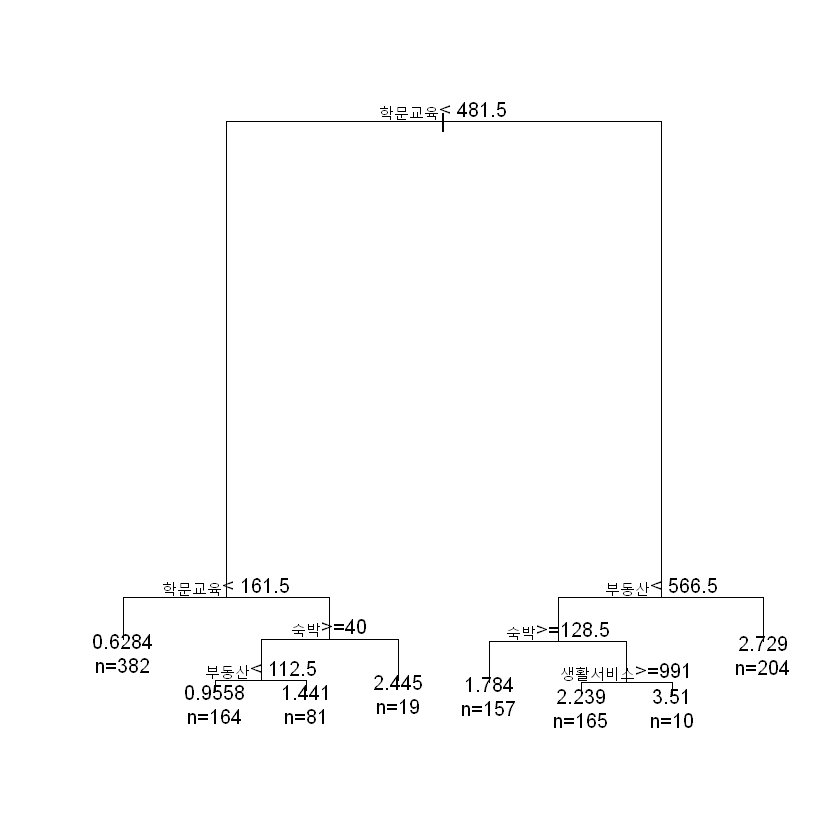

In [237]:
opar <- par(mfrow = c(1,1), xpd = NA)
plot(data_tr)
text(data_tr, use.n=TRUE)
par(opar)

## C-4) 나무모형 예측 결과 
- 1970 중 1913개의 예측수를 보여준다.
- 0.4 rmse로 위에 모델보다 낮은 오차율을 보여준다.

In [238]:
yhat_tr <- predict(data_tr, haha)

In [240]:
a <- yhat_tr[yhat_tr < 0.8]
b<- yhat_tr[ 1.5 >= yhat_tr & yhat_tr >= 0.8]
c <- yhat_tr[1.5 < yhat_tr]
a[] <- '소멸위험지역'
b[] <- '소멸위기지역'
c[] <- '소멸안정지역'
pred<-c(a,b,c)
head(pred)
length(pred)

1              2              3              4              5 
"소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" 
             6 
"소멸위험지역"

[1] 1970

In [241]:
table(result, pred)

              pred
result         소멸안정지역 소멸위기지역 소멸위험지역
  소멸안정지역          913            0            0
  소멸위기지역           44          382           13
  소멸위험지역            0            0          618

In [242]:
result3 <- haha$소멸비율
rmse(result3, yhat_tr)

[1] 0.4249914

## D. 랜덤포레스트

In [243]:
set.seed(9876)
data_rf <- randomForest(소멸비율 ~., training)
data_rf


Call:
 randomForest(formula = 소멸비율 ~ ., data = training) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 0.06878827
                    % Var explained: 92

#### 에러는 tree수가 많을 수록 적게 발생됨을 보여준다.

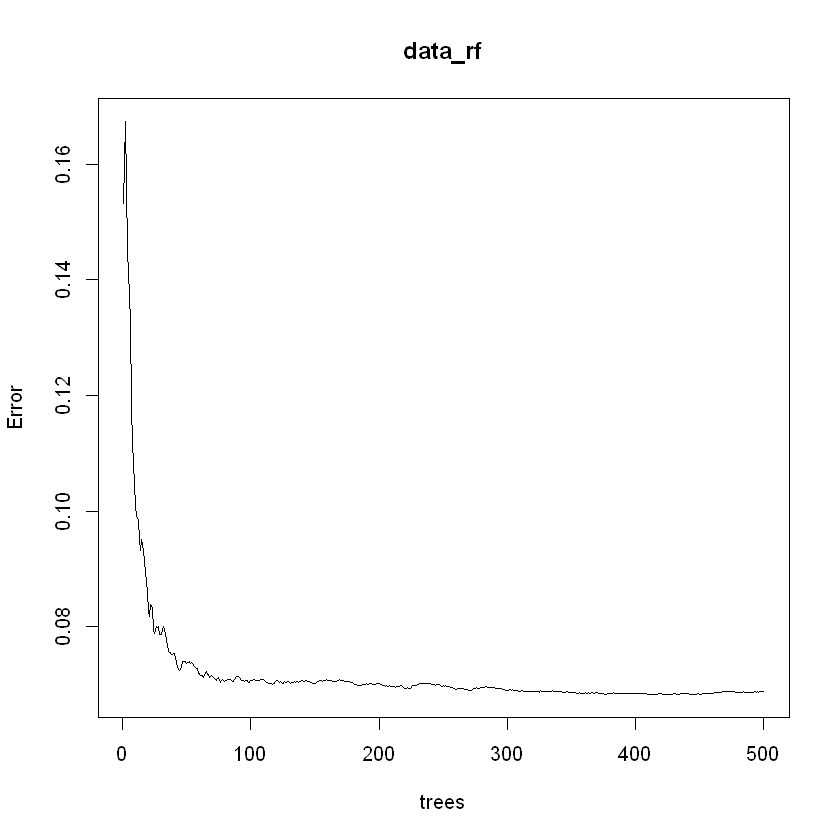

In [244]:
plot(data_rf)

## D-1) 랜덤포레스트 모델링으로 나온 독립변수의 중요도 
- 학문교육 >  부동산 > 관광여가오락 > 생활서비스 

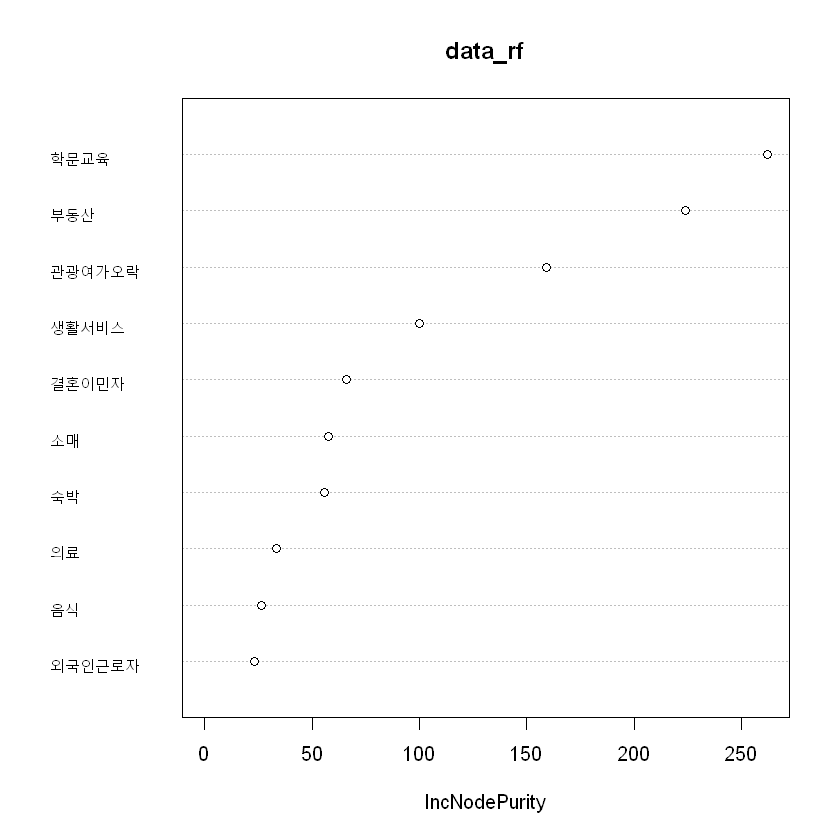

In [245]:
varImpPlot(data_rf)

In [246]:
yhat_rf <- predict(data_rf, newdata= haha)

In [247]:
a <- yhat_rf[yhat_rf < 0.8]
b<- yhat_rf[ 1.5 >= yhat_rf & yhat_rf >= 0.8]
c <- yhat_rf[1.5 < yhat_rf]
a[] <- '소멸위험지역'
b[] <- '소멸위기지역'
c[] <- '소멸안정지역'
pred<-c(a,b,c)
head(pred)

1              2              3              4              5 
"소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" "소멸위험지역" 
             6 
"소멸위험지역"

## D-2) 랜덤포레스트 예측 결과
- 1970개 중 1912개의 예측값
- rmse는 0.2로 가장 낮을 오차율을 보여준다.

In [251]:
table(result, pred)

              pred
result         소멸안정지역 소멸위기지역 소멸위험지역
  소멸안정지역          913            0            0
  소멸위기지역           34          405            0
  소멸위험지역            0           24          594

- 실제 소멸비율과 예측된 소멸비율 비교해보기

In [252]:
result_rate <- as.list(data$소멸비율)
head(result_rate)
head(yhat_rf)

[[1]]
[1] 0.3139632

[[2]]
[1] 0.3156284

[[3]]
[1] 0.3180173

[[4]]
[1] 0.3230777

[[5]]
[1] 0.3326796

[[6]]
[1] 0.3329543

1         2         3         4         5         6 
0.3591753 0.3625237 0.3440308 0.3555181 0.3851517 0.3896280

In [250]:
rmse(result3, yhat_rf)

[1] 0.1835074

## E. 부스팅 

In [253]:
set.seed(9876)
data_gbm <- gbm(소멸비율~., data=training,
               n.trees=4000, cv.folds=3, verbose=TRUE)

Distribution not specified, assuming gaussian ...
Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        0.8591             nan     0.0010    0.0009
     2        0.8581             nan     0.0010    0.0010
     3        0.8570             nan     0.0010    0.0010
     4        0.8560             nan     0.0010    0.0010
     5        0.8550             nan     0.0010    0.0010
     6        0.8539             nan     0.0010    0.0010
     7        0.8529             nan     0.0010    0.0010
     8        0.8518             nan     0.0010    0.0010
     9        0.8509             nan     0.0010    0.0010
    10        0.8499             nan     0.0010    0.0010
    20        0.8399             nan     0.0010    0.0010
    40        0.8201             nan     0.0010    0.0010
    60        0.8014             nan     0.0010    0.0009
    80        0.7833             nan     0.0010    0.0009
   100        0.7659             nan     0.0010    0.0008
   120        0.7491  

[1] 4000

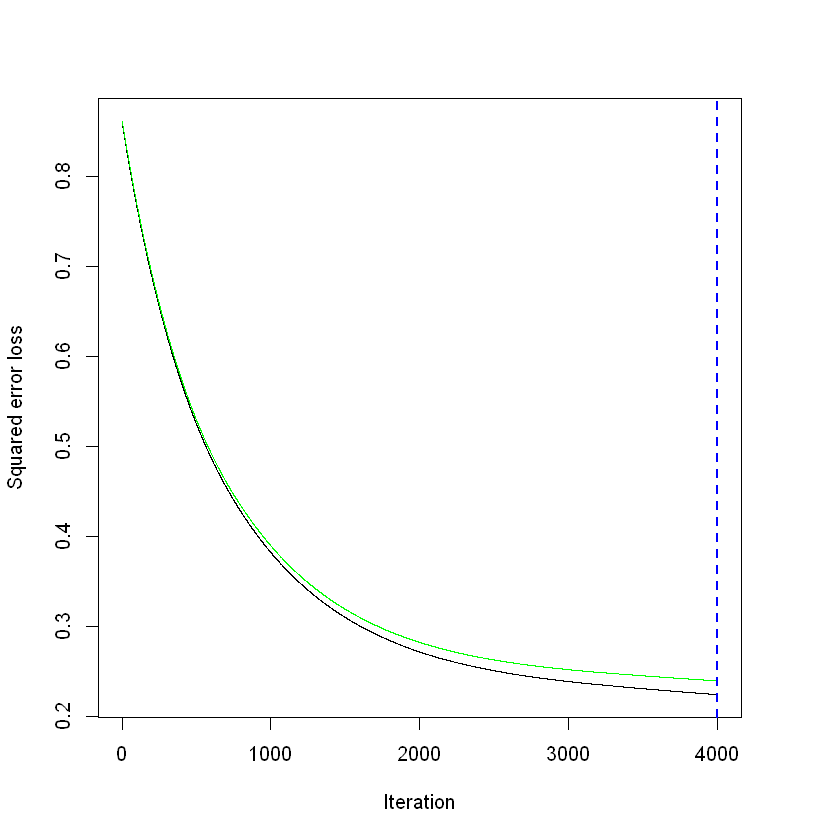

In [254]:
(best.iter = gbm.perf(data_gbm, method='cv'))

## E-1) 오차율은 1.17로 모델링 중 가장 높게 나왔다

In [255]:
yhat_gbm <- predict(data_gbm, n.trees=best.iter, newdata=validation)
rmse(result2, yhat_gbm)

[1] 1.173583

# 5. 최종 모형선택
### 랜덤포레스트 > 나무모형 > 선형회귀 > 부스팅

In [256]:
data.frame(lm = rmse(result3, pop_lm),
          rf = rmse(result3, yhat_rf),
          tr = rmse(result3, yhat_tr),
          gbm = rmse(result3, yhat_gbm)) %>%
reshape2::melt(value.name = 'rmse', variable.name='method')

No id variables; using all as measure variables


method,rmse
lm,0.6360454
rf,0.1835074
tr,0.4249914
gbm,1.1740801


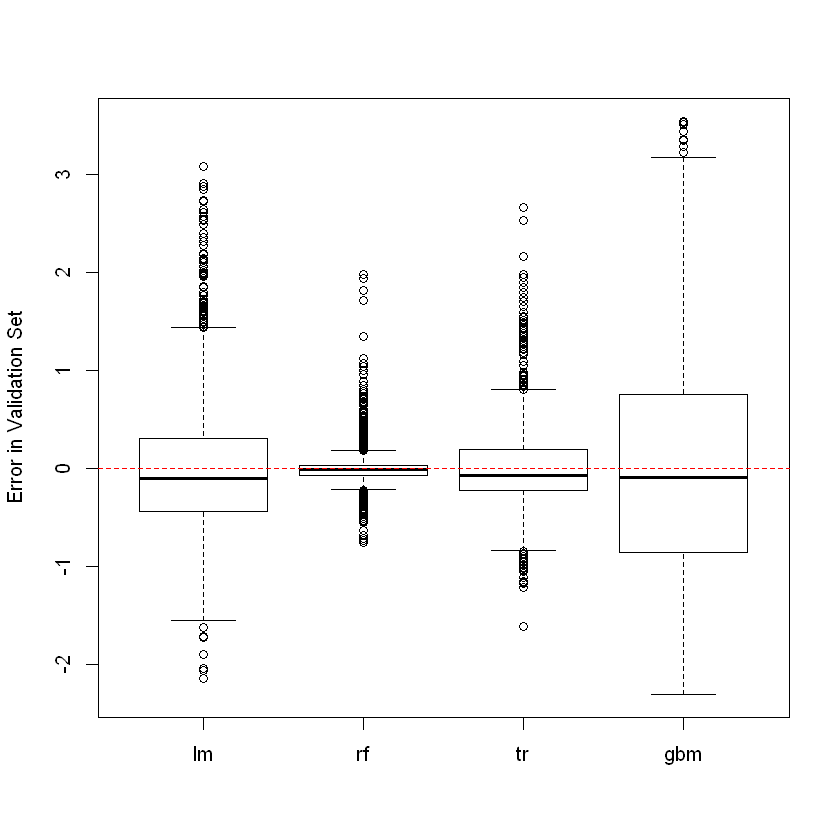

In [257]:
boxplot(list(lm = result3 - pop_lm,
            rf = result3 - yhat_rf,
            tr = result3 - yhat_tr,
            gbm = result3 - yhat_gbm), ylab='Error in Validation Set')
abline(h=0, lty=2, col='red')

# 5-1) 다음과 같은 시각화로 각 예측모형들의 예측확률들의 관계 알기

> 결과
- 선형회귀 모형과 랜덤포레스트 모형도 상관관계가 높다. 
- 반응변수의 관측치와 가장 상관관계가 높은, 즉 예측력이 높은 방법은 랜덤포레스트이다.

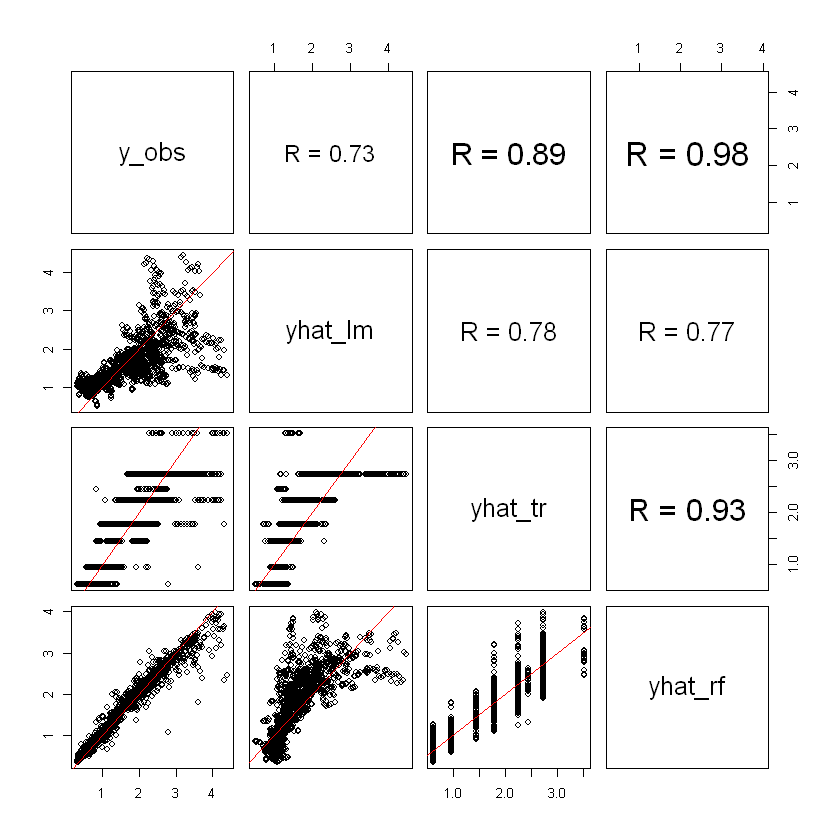

In [150]:
pairs(data.frame(y_obs=result3,
                 yhat_lm=pop_lm,
                 yhat_tr=yhat_tr,
                 yhat_rf=yhat_rf),
      lower.panel=function(x,y){ points(x,y); abline(0, 1, col='red')},
      upper.panel = panel.cor)

## 6. 랜덤포레스트 분석 모델링 사용
- 각 변수간 갖는 정확도와 오류값 등의 정보 제공
- 종속변수를 소멸비율이 아닌 소멸위험지역으로 할 때의 경우도 살펴봄

In [260]:
#install.packages('ROCR')
#install.packages('pROC')
#install.packages('MASS')
#library(ROCR)
#library(MASS)
#library(pROC)

In [261]:
소멸지역여부 <- train_data$소멸지역여부
train2 <- cbind(training, 소멸지역여부)
head(train2)

소멸비율,관광여가오락,부동산,생활서비스,소매,숙박,음식,의료,학문교육,외국인근로자,결혼이민자,소멸지역여부
2.5308015,194,253,1481,3059,128,3413,261,679,4107,267,소멸안정지역
0.9663420,41,69,450,947,43,1242,68,155,126,263,소멸위기지역
0.5003123,52,52,383,1045,142,1192,56,119,2474,159,소멸위험지역
1.6574162,390,414,2449,4487,142,3574,453,925,148,458,소멸안정지역
1.1271693,111,131,803,1854,65,45,2131,201,388,498,소멸위기지역
0.7186660,36,18,364,699,133,849,41,98,160,64,소멸위험지역


In [262]:
rf_model2 <- randomForest(소멸지역여부 ~ 관광여가오락+부동산+생활서비스+소매+숙박+음식+의료+학문교육+외국인근로자+결혼이민자, data=train2)

>  data_rf는 소멸비율을 종속변수로 잡고 rf_model2는 소멸지역여부를 종속변수로 잡고 랜덤포레스트로 돌렸을 경우 변수 우선순위 5개 변하지 않음을 보여준다

,MeanDecreaseGini
관광여가오락,107.59241
부동산,161.40151
생활서비스,63.74944
소매,53.57613
숙박,50.99659
음식,35.26012
의료,34.28694
학문교육,174.42567
외국인근로자,22.36759
결혼이민자,57.98686


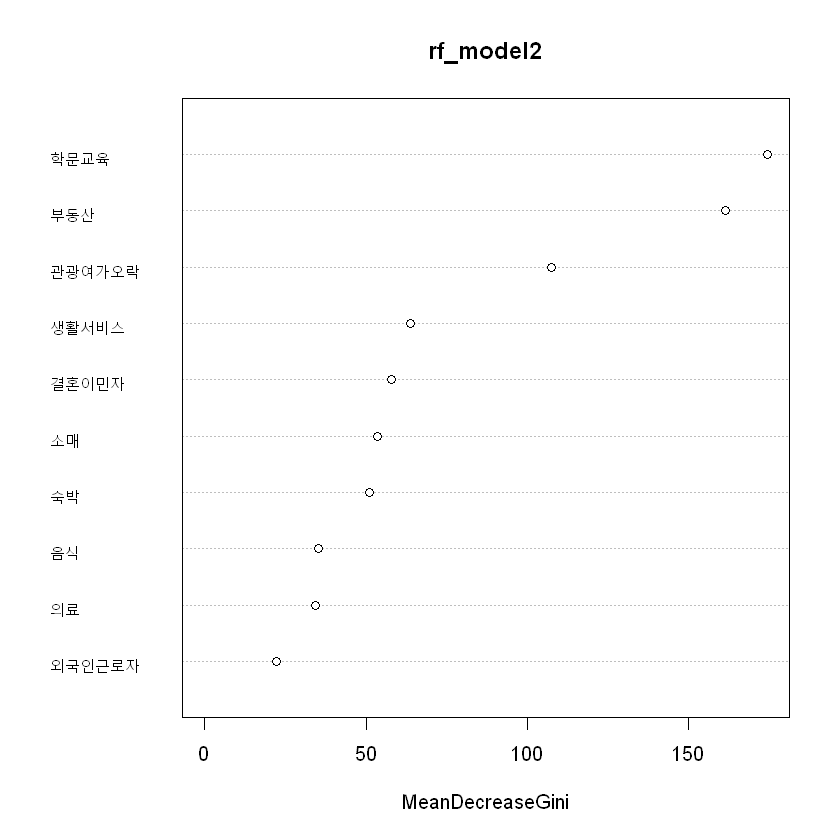

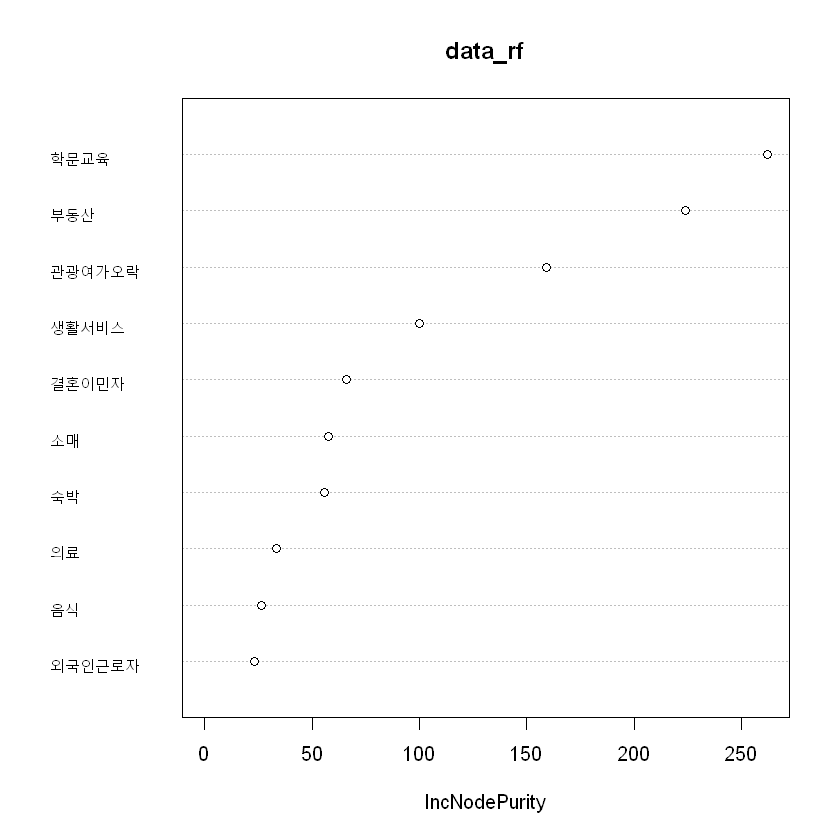

In [271]:
importance(rf_model2)
varImpPlot(rf_model2)
varImpPlot(data_rf)

In [264]:
#변수들간 정보들
library(caret)
train2$rf_pred <- predict(rf_model2, training, type="response")
head(train2)

소멸비율,관광여가오락,부동산,생활서비스,소매,숙박,음식,의료,학문교육,외국인근로자,결혼이민자,소멸지역여부,rf_pred
2.5308015,194,253,1481,3059,128,3413,261,679,4107,267,소멸안정지역,소멸안정지역
0.9663420,41,69,450,947,43,1242,68,155,126,263,소멸위기지역,소멸위기지역
0.5003123,52,52,383,1045,142,1192,56,119,2474,159,소멸위험지역,소멸위험지역
1.6574162,390,414,2449,4487,142,3574,453,925,148,458,소멸안정지역,소멸안정지역
1.1271693,111,131,803,1854,65,45,2131,201,388,498,소멸위기지역,소멸위기지역
0.7186660,36,18,364,699,133,849,41,98,160,64,소멸위험지역,소멸위험지역


## 소멸지역여부를 종속변수로 잡았을 경우 예측값은 100%일치함을 보였다.

In [266]:
table(train2$소멸지역여부, train2$rf_pred)

              
               소멸안정지역 소멸위기지역 소멸위험지역
  소멸안정지역          529            0            0
  소멸위기지역            0          289            0
  소멸위험지역            0            0          364

## 랜덤포레스트 오차율 0.11

In [270]:
rmse(result2, rf_pred)

[1] 0.1128513